opening the data file as a table

In [3]:

import pandas as pd
df = pd.read_csv(r"C:\Users\adiya\OneDrive\adiya\kaggle\reddit_breakup_dataset_cleaned.csv")
print("The Reddit dataframe is as follows:-")
display(df)

The Reddit dataframe is as follows:-


,title,body,upvotes,comments_count,post_date,flair,url,author_age,relationship_length,top_comments
0,"Been on both sides of a breakup now, here’s wh...",Two weeks ago I ended a nearly 2 year relation...,259,129,2025-06-30 00:55:24,NaN,https://www.reddit.com/r/BreakUps/comments/1ln...,NaN,NaN,Well said. Just got dumped 2 days ago and the ...
1,I saw my ex with his new gf,I broke up with him on May 2nd. By June 6th he...,21,32,2025-06-30 14:21:49,NaN,https://www.reddit.com/r/BreakUps/comments/1lo...,NaN,NaN,You broke up with him. Did you also want him t...
2,Didn’t think losing someone who was already di...,"We hadn’t really been ""us"" for a while. The te...",22,5,2025-06-30 13:40:12,NaN,https://www.reddit.com/r/BreakUps/comments/1lo...,NaN,NaN,"ha, i'm there with you. i feel it all as well...."
3,7 year relationship gone in an instant.,I moved citys to live together and had our own...,54,9,2025-06-30 08:39:47,Trigger Warning,https://www.reddit.com/r/BreakUps/comments/1lo...,NaN,NaN,Wow. You are mentally very strong and kudos to...
4,When they come back it’s never worth it.,Post says it all. He came back after a few mon...,111,25,2025-06-30 03:54:54,NaN,https://www.reddit.com/r/BreakUps/comments/1ln...,NaN,NaN,It's only worth it when they come back after b...
...,...,...,...,...,...,...,...,...,...,...
943,How to get over a niche person?,"As the title says, how do you get over someone...",1,0,2025-06-27 21:54:39,NaN,https://www.reddit.com/r/BreakUps/comments/1lm...,NaN,NaN,NaN
944,the internet said “just block them” so i built...,blocking them is step 1. \nstep 2 is resistin...,1,0,2025-06-27 21:54:13,NaN,https://www.reddit.com/r/BreakUps/comments/1lm...,NaN,NaN,NaN
945,i turned my breakup spiral into a kit. i didn’...,literally just made it to keep myself from tex...,0,0,2025-06-27 21:53:48,NaN,https://www.reddit.com/r/BreakUps/comments/1lm...,NaN,NaN,NaN
946,i didn’t find a breakup guide that worked… so ...,every “healing” post online felt too pretty fo...,1,0,2025-06-27 21:53:16,NaN,https://www.reddit.com/r/BreakUps/comments/1lm...,NaN,NaN,NaN


making a Wordcloud to display the frequency of words used in the data

Available columns: ['title', 'body', 'upvotes', 'comments_count', 'post_date', 'flair', 'url', 'author_age', 'relationship_length', 'top_comments']


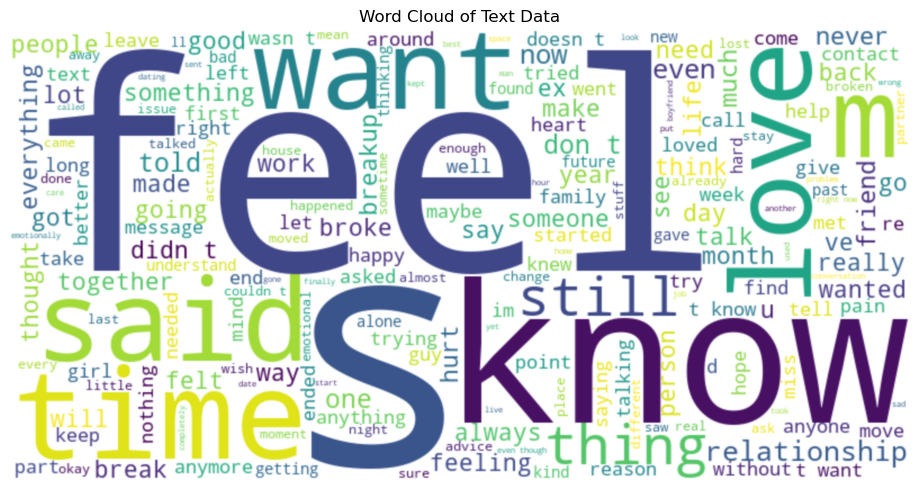

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
df = pd.read_csv(r"C:\Users\adiya\OneDrive\adiya\kaggle\reddit_breakup_dataset_cleaned.csv")
print("Available columns:", df.columns.tolist())
text_column = 'body'
if text_column in df.columns:
    all_text = ' '.join(df[text_column].dropna().astype(str))

    wordcloud = WordCloud(width=800, height=400, background_color='white', 
                         max_words=200, contour_width=5, contour_color='pink').generate(all_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bicubic')
    plt.axis('off')
    plt.title('Word Cloud of Text Data')
    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{text_column}' not found. Available columns are: {df.columns.tolist()}")


After running this installation command, you should be able to run your original code without the ModuleNotFoundError. The exclamation mark (!) at the beginning tells Jupyter to execute this as a shell command rather than Python code.

Once the installation is complete, you can run your original code again.

sentiment analysis using 
i) VaderSentiment


In [17]:
!pip install vaderSentiment
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [24]:

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    if not isinstance(text, str):
        return 'Neutral' 

    scores = analyzer.polarity_scores(text)
    compound_score = scores['compound']

    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

    text_columns = df.select_dtypes(include=['object']).columns
    if len(text_columns) > 0:
        text_column = text_columns[0]
        print(f"Using '{text_column}' column for sentiment analysis")
    else:
        raise ValueError("No text column found in the dataframe")

df['sentiment'] = df[text_column].apply(get_sentiment)

print(f" Here's the head of the dataframe with the new sentiment column:")
display(df)

 Here's the head of the dataframe with the new sentiment column:


,title,body,upvotes,comments_count,post_date,flair,url,author_age,relationship_length,top_comments,sentiment
0,"Been on both sides of a breakup now, here’s wh...",Two weeks ago I ended a nearly 2 year relation...,259,129,2025-06-30 00:55:24,NaN,https://www.reddit.com/r/BreakUps/comments/1ln...,NaN,NaN,Well said. Just got dumped 2 days ago and the ...,Neutral
1,I saw my ex with his new gf,I broke up with him on May 2nd. By June 6th he...,21,32,2025-06-30 14:21:49,NaN,https://www.reddit.com/r/BreakUps/comments/1lo...,NaN,NaN,You broke up with him. Did you also want him t...,Neutral
2,Didn’t think losing someone who was already di...,"We hadn’t really been ""us"" for a while. The te...",22,5,2025-06-30 13:40:12,NaN,https://www.reddit.com/r/BreakUps/comments/1lo...,NaN,NaN,"ha, i'm there with you. i feel it all as well....",Negative
3,7 year relationship gone in an instant.,I moved citys to live together and had our own...,54,9,2025-06-30 08:39:47,Trigger Warning,https://www.reddit.com/r/BreakUps/comments/1lo...,NaN,NaN,Wow. You are mentally very strong and kudos to...,Neutral
4,When they come back it’s never worth it.,Post says it all. He came back after a few mon...,111,25,2025-06-30 03:54:54,NaN,https://www.reddit.com/r/BreakUps/comments/1ln...,NaN,NaN,It's only worth it when they come back after b...,Negative
...,...,...,...,...,...,...,...,...,...,...,...
943,How to get over a niche person?,"As the title says, how do you get over someone...",1,0,2025-06-27 21:54:39,NaN,https://www.reddit.com/r/BreakUps/comments/1lm...,NaN,NaN,NaN,Neutral
944,the internet said “just block them” so i built...,blocking them is step 1. \nstep 2 is resistin...,1,0,2025-06-27 21:54:13,NaN,https://www.reddit.com/r/BreakUps/comments/1lm...,NaN,NaN,NaN,Negative
945,i turned my breakup spiral into a kit. i didn’...,literally just made it to keep myself from tex...,0,0,2025-06-27 21:53:48,NaN,https://www.reddit.com/r/BreakUps/comments/1lm...,NaN,NaN,NaN,Positive
946,i didn’t find a breakup guide that worked… so ...,every “healing” post online felt too pretty fo...,1,0,2025-06-27 21:53:16,NaN,https://www.reddit.com/r/BreakUps/comments/1lm...,NaN,NaN,NaN,Neutral


plotting a graph using this sentiment analysis

C:\Users\adiya\AppData\Local\Temp\ipykernel_424\354291134.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['maroon', 'midnightblue', 'palegreen']) # Changed color to palette


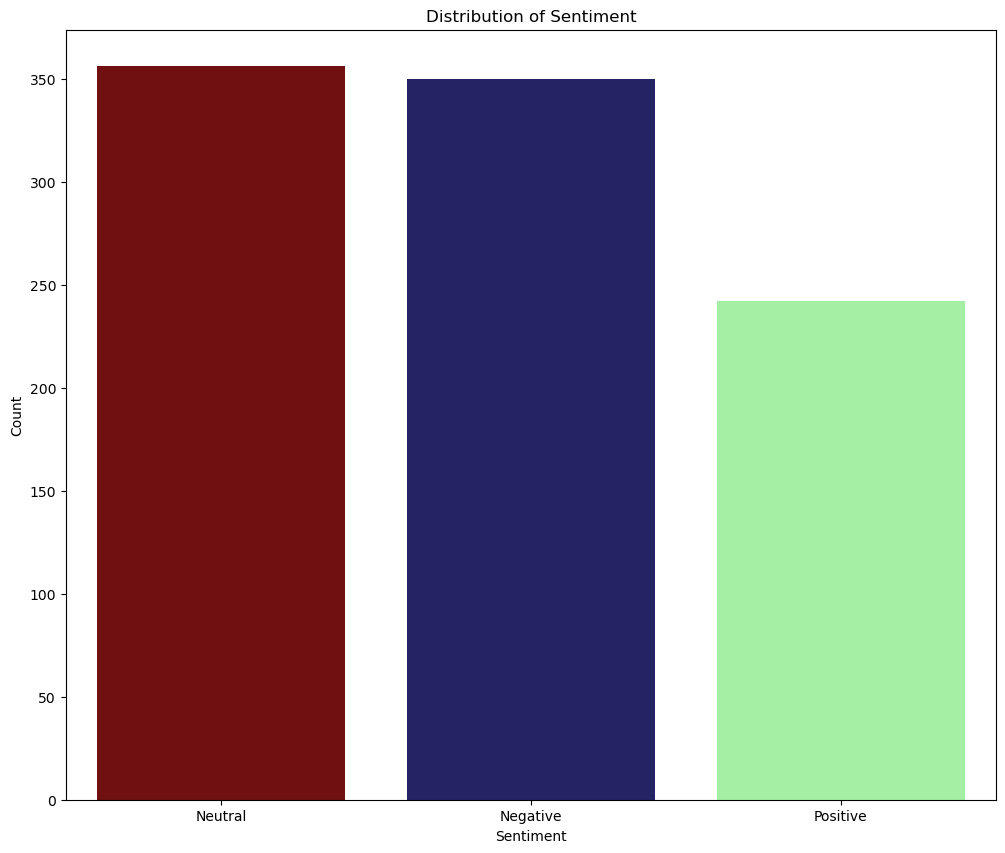

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(12, 10))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['maroon', 'midnightblue', 'palegreen']) 
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

analyzing w.r.t date

In [30]:
df['post_date'] = pd.to_datetime(df['post_date'])
df['year'] = df['post_date'].dt.year
display(df[['post_date', 'year']].head())

,post_date,year
0,2025-06-30 00:55:24,2025
1,2025-06-30 14:21:49,2025
2,2025-06-30 13:40:12,2025
3,2025-06-30 08:39:47,2025
4,2025-06-30 03:54:54,2025


In [31]:
sentiment_by_year = df.groupby(['year', 'sentiment']).size().reset_index(name='count')
display(sentiment_by_year)

,year,sentiment,count
0,2025,Negative,350
1,2025,Neutral,356
2,2025,Positive,242


ii) analyzing using SentiWord sentiment analysis

In [5]:
!pip install nltk
import nltk
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize

def sentiwordnet_sentiment(text):
    if not isinstance(text, str) or len(text.strip()) == 0:
        return 0.0

    tokens = word_tokenize(text)
    tagged_words = pos_tag(tokens)

    sentiment_score = 0
    num_terms_with_scores = 0
    lemmatizer = WordNetLemmatizer()

    for word, tag in tagged_words:
        wn_tag = ''
        if tag.startswith('J'):
            wn_tag = wn.ADJ
        elif tag.startswith('V'):
            wn_tag = wn.VERB
        elif tag.startswith('N'):
            wn_tag = wn.NOUN
        elif tag.startswith('R'):
            wn_tag = wn.ADV
        else:
            continue

        lemmatized_word = lemmatizer.lemmatize(word, wn_tag)
        synsets = list(swn.senti_synsets(lemmatized_word, wn_tag))

        if synsets:
            # Get the first synset's scores
            senti_synset = synsets[0]
            sentiment_score += senti_synset.pos_score() - senti_synset.neg_score()
            num_terms_with_scores += 1

    if num_terms_with_scores > 0:
        return sentiment_score / num_terms_with_scores
    else:
        return 0.0

print("sentiwordnet_sentiment function created.")

sentiwordnet_sentiment function created.


In [41]:
import re

def clean_text(text):
    if isinstance(text, str):
        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        # Remove mentions and hashtags
        text = re.sub(r'@\w+|\#\w+', '', text)
        # Convert to lowercase
        text = text.lower()
        # Remove special characters
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
        return text
    else:
        return "" # Return empty string for non-string types

df['clean_text'] = df['body'].apply(clean_text)

print("Cleaned text column added. Here's the head of the dataframe with the new column:")
print(df[['body', 'clean_text']].head())


Cleaned text column added. Here's the head of the dataframe with the new column:
                                                body  \
0  Two weeks ago I ended a nearly 2 year relation...   
1  I broke up with him on May 2nd. By June 6th he...   
2  We hadn’t really been "us" for a while. The te...   
3  I moved citys to live together and had our own...   
4  Post says it all. He came back after a few mon...   

                                          clean_text  
0  two weeks ago i ended a nearly 2 year relation...  
1  i broke up with him on may 2nd by june 6th he ...  
2  we hadnt really been us for a while the texts ...  
3  i moved citys to live together and had our own...  
4  post says it all he came back after a few mont...  


In [1]:
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize

def sentiwordnet_sentiment(text):
    if not isinstance(text, str) or len(text.strip()) == 0:
        return 0.0

    tokens = word_tokenize(text)
    tagged_words = pos_tag(tokens)

    sentiment_score = 0
    num_terms_with_scores = 0
    lemmatizer = WordNetLemmatizer()

    for word, tag in tagged_words:
        wn_tag = ''
        if tag.startswith('J'):
            wn_tag = wn.ADJ
        elif tag.startswith('V'):
            wn_tag = wn.VERB
        elif tag.startswith('N'):
            wn_tag = wn.NOUN
        elif tag.startswith('R'):
            wn_tag = wn.ADV
        else:
            continue

        lemmatized_word = lemmatizer.lemmatize(word, wn_tag)
        synsets = list(swn.senti_synsets(lemmatized_word, wn_tag))

        if synsets:
            # Get the first synset's scores
            senti_synset = synsets[0]
            sentiment_score += senti_synset.pos_score() - senti_synset.neg_score()
            num_terms_with_scores += 1

    if num_terms_with_scores > 0:
        return sentiment_score / num_terms_with_scores
    else:
        return 0.0

print("sentiwordnet_sentiment function created.")

sentiwordnet_sentiment function created.


In [6]:
import nltk
try:
    nltk.data.find('taggers/averaged_perceptron_tagger_eng')
except LookupError:
    nltk.download('averaged_perceptron_tagger_eng')
df['sentiwordnet_score'] = df['clean_text'].apply(sentiwordnet_sentiment)
display(df[['clean_text', 'sentiwordnet_score']].head())

KeyError: 'clean_text'

Descriptive statistics for SentiWordNet scores:
count    948.000000
mean       0.007010
std        0.032835
min       -0.250000
25%       -0.009667
50%        0.007890
75%        0.026158
max        0.173077
Name: sentiwordnet_score, dtype: float64


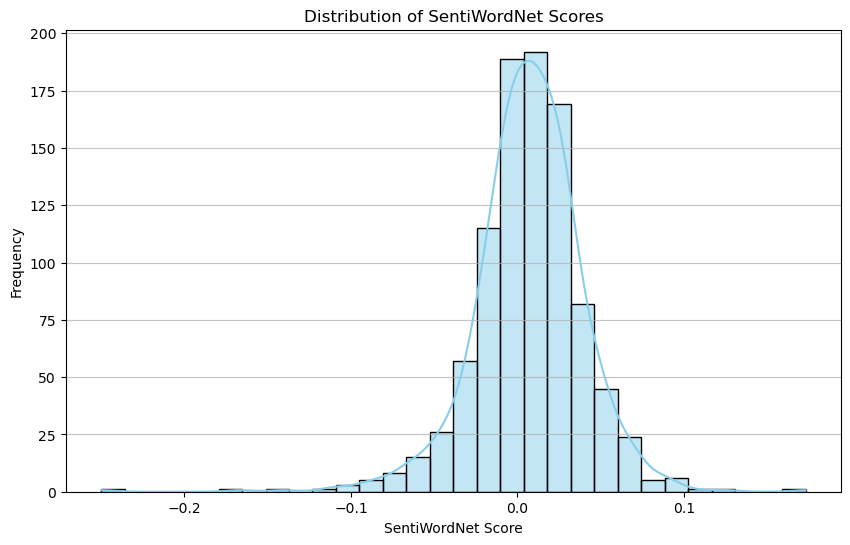


Comparison of SentiWordNet and VADER sentiment distributions:
sentiment
Neutral     356
Negative    350
Positive    242
Name: count, dtype: int64


In [47]:
# 1. Calculate descriptive statistics
print("Descriptive statistics for SentiWordNet scores:")
print(df['sentiwordnet_score'].describe())

# 2. Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiwordnet_score'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of SentiWordNet Scores')
plt.xlabel('SentiWordNet Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

print("\nComparison of SentiWordNet and VADER sentiment distributions:")

print(df['sentiment'].value_counts())


emotion analysis
